In [74]:
#https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb
import math
from matplotlib import style
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import ta

plt.style.use('ggplot')

start = dt.datetime(2019, 12, 31)
end = dt.datetime.now()
df = web.DataReader("TSLA", 'yahoo', start, end)
#df.reset_index(inplace=True)
#df.set_index("Date", inplace=True)
#df = df.drop("Symbol", axis=1)
#df.to_csv('TSLA.csv')
#df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

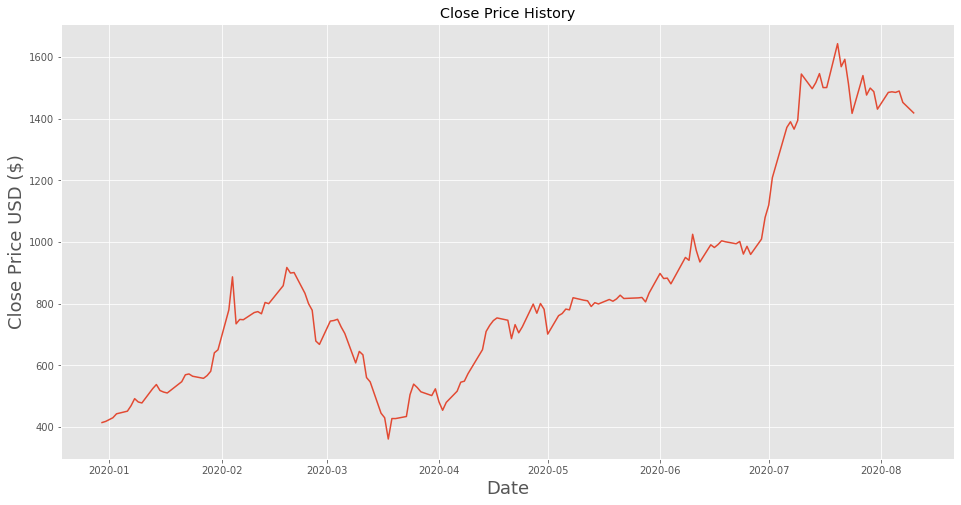

In [75]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [76]:
from ta.volatility import AverageTrueRange
#Create a new dataframe with only the 'Close' column
close = df.filter(['Close'])
#Create a new dataframe with only the 'Volume' column
#volume = df.filter(['Volume'])

# Initialize ATR Indicator
indicator_atr = AverageTrueRange(high=df["High"],low=df["Low"],close=df["Close"])

# Add ATR
df['ATR'] = indicator_atr.average_true_range()

# Initialize ATR Indicator
indicator_atr_2 = AverageTrueRange(high=df["ATR"],low=df["ATR"],close=df["ATR"])

# Add ATR
df['ATR_2'] = indicator_atr_2.average_true_range()

df['difference'] = df['ATR_2']/df['Close']

In [77]:
df['Shift'] = close-close.shift(1)

In [78]:
df['Shift_with_volume'] = df['Shift']*df['Volume']

In [79]:
df['Accumulated_shift_with_volume'] = df['Shift_with_volume'].cumsum()
df.tail(20)

,High,Low,Open,Close,Volume,Adj Close,ATR,ATR_2,difference,Shift,Shift_with_volume,Accumulated_shift_with_volume
Date,,,,,,,,,,,,
2020-07-14,1590.000000,1431.000000,1556.000000,1516.800049,23418100,1516.800049,94.940859,3.664767,0.002416,19.739990,4.622731e+08,2.577869e+10
2020-07-15,1550.000000,1457.000000,1543.000000,1546.010010,16367800,1546.010010,94.802226,3.412900,0.002208,29.209961,4.781028e+08,2.625680e+10
2020-07-16,1531.709961,1466.000000,1477.160034,1500.640015,14300800,1500.640015,93.745639,3.244592,0.002162,-45.369995,-6.488272e+08,2.560797e+10
2020-07-17,1537.510010,1490.000000,1513.449951,1500.839966,9330000,1500.839966,90.443094,3.248731,0.002165,0.199951,1.865544e+06,2.560983e+10
2020-07-20,1650.000000,1488.000000,1519.010010,1643.000000,17121400,1643.000000,95.554302,3.381765,0.002058,142.160034,2.433979e+09,2.804381e+10
2020-07-21,1675.000000,1558.000000,1639.930054,1568.359985,16157300,1568.359985,97.086137,3.249627,0.002072,-74.640015,-1.205981e+09,2.683783e+10
2020-07-22,1626.420044,1562.000000,1599.000000,1592.329956,14161100,1592.329956,94.752845,3.184175,0.002000,23.969971,3.394412e+08,2.717727e+10
2020-07-23,1689.000000,1480.770020,1678.949951,1513.069946,24328500,1513.069946,102.858355,3.535699,0.002337,-79.260010,-1.928277e+09,2.524900e+10
2020-07-24,1465.000000,1366.540039,1416.010010,1417.000000,19396600,1417.000000,105.977751,3.505963,0.002474,-96.069946,-1.863430e+09,2.338557e+10


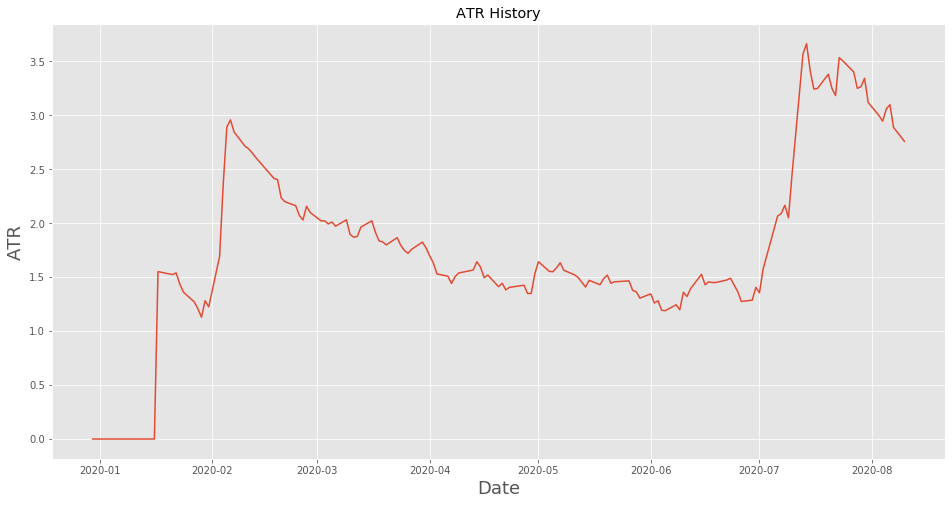

In [80]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('ATR History')
#plt.plot(df['ATR'])
plt.plot(df['ATR_2'])
#plt.plot(df['difference'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('ATR',fontsize=18)
plt.show()

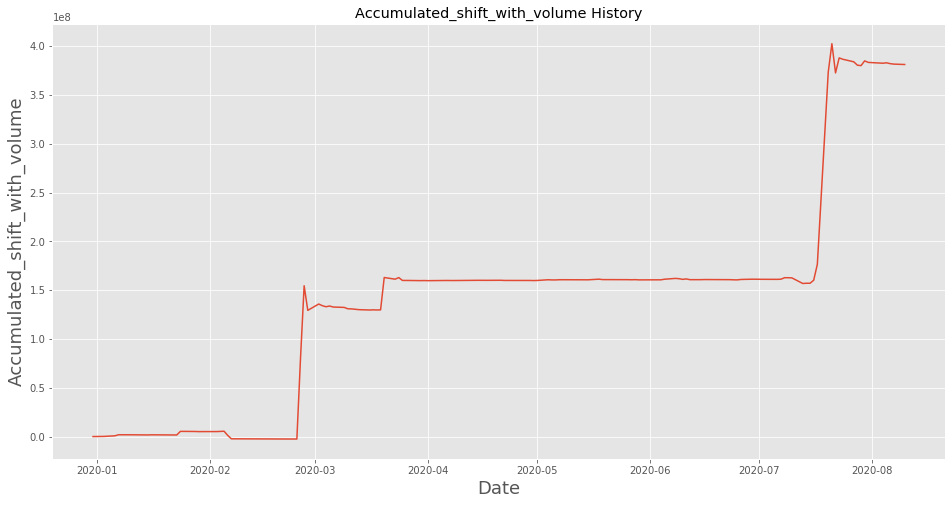

In [44]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Accumulated_shift_with_volume History')
plt.plot(df['Accumulated_shift_with_volume'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Accumulated_shift_with_volume',fontsize=18)
plt.show()

In [164]:
def process_accumated(df):
    close = df.filter(['Close'])

    df['Shift'] = close-close.shift(1)
    df['Shift_with_volume'] = df['Shift']*df['Volume']
    df['Accumulated_shift_with_volume'] = df['Shift_with_volume'].cumsum()
    return df
import pickle
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        ticker = ticker.strip("\n")
        if "." in ticker:
            ticker = ticker.replace(".","-")
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        df = process_accumated(df)
        
        if "MMM" in  ticker:
            print(df.head())
        df.rename(columns={'Accumulated_shift_with_volume': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume','Adj Close','Shift','Shift_with_volume'], 1, inplace=True)
        if "MMM" in  ticker:
            print(df.head())
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes_shift_with_volume.csv')
compile_data()

                 High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2009-12-31  84.080002  82.540001  83.790001  82.669998  2049800.0  62.630104   
2010-01-04  83.449997  82.669998  83.089996  83.019997  3043700.0  62.895260   
2010-01-05  83.230003  81.699997  82.800003  82.500000  2847000.0  62.501301   
2010-01-06  84.599998  83.510002  83.879997  83.669998  5268500.0  63.387695   
2010-01-07  83.760002  82.120003  83.320000  83.730003  4470100.0  63.433144   

               Shift  Shift_with_volume  Accumulated_shift_with_volume  
Date                                                                    
2009-12-31       NaN                NaN                            NaN  
2010-01-04  0.349998       1.065290e+06                   1.065290e+06  
2010-01-05 -0.519997      -1.480430e+06                  -4.151401e+05  
2010-01-06  1.169998       6.164135e+06                   5.748995e+06  
2

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000 -0.326317  0.915727  0.872403  0.086296  0.305319 -0.428635   
ABT  -0.326317  1.000000 -0.206142 -0.233984 -0.061082 -0.340280  0.063128   
ABBV  0.915727 -0.206142  1.000000  0.890791  0.249356  0.470529 -0.485418   
ABMD  0.872403 -0.233984  0.890791  1.000000  0.213160  0.245846 -0.451985   
ACN   0.086296 -0.061082  0.249356  0.213160  1.000000 -0.086084 -0.585827   

           AMD       AAP       AES    ...         WYNN       XEL       XRX  \
MMM  -0.905250  0.430074 -0.257261    ...     0.789230 -0.320771  0.376905   
ABT   0.210429  0.075885  0.292871    ...    -0.276003  0.030019  0.038986   
ABBV -0.886310  0.322569 -0.295837    ...     0.735411 -0.209800  0.290214   
ABMD -0.874196  0.392053 -0.167172    ...     0.633939 -0.281641  0.279204   
ACN  -0.220605  0.063539 -0.082592    ...     0.321138 -0.009402 -0.086212   

          XLNX       XYL       YUM      ZBRA       ZBH      ZI

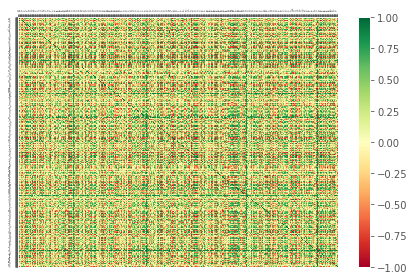

In [2]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes_shift_with_volume.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr_shift_with_volume.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels,fontsize=1)
    ax1.set_yticklabels(row_labels,fontsize=1)
    ax1.xaxis.set_tick_params(labelsize=1)
    ax1.yaxis.set_tick_params(labelsize=1)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    #plt.show()
    plt.savefig('correlation_shift_with_volume.png',dpi=1000)
    
visualize_data()